# SOME-TOOLS for combined plots
------------------------------------
Small tutorial for combine map plots with the `plot_pygmt` module. Please give a look to previous book before dive into this.

In this book I will provide the possibilities of combining:

1. Elevation profile + Depth section
2. Epicentral Map + Elevation profile + Depth section

Let's setup the imports first ...

In [2]:
%matplotlib inline
#
import pygmt
from obspy import read, UTCDateTime
#
import some_tools
from some_tools import plot_pygmt as SPL
#
print("SOME-tools version:  %s" % some_tools.__version__)

SOME-tools version:  0.0.5


## ELEVATION + DEPTH profiles

In this case we need to configurate properly our API, lets start with the elevation first:

In [3]:
database = "./database/gapss_initial_events.csv"
demgrid = './database/LTGF.nc'
# SECTION = [10.65, 43.15, 11.18, 43.15]
SECTION = [10.7, 43.10, 11.05, 43.25]

# =============== Elevation related
elevation_config = {
  'auto_scale': False,
  'section_profile': SECTION,
  'section_elevation': [0, 1],
  'sampling_dist': 0.5,
  'convert_to_km': True,
  'auto_frame': False,
  'plot_frame': {
    'big_x_tick_interval': 1.0,
    'small_x_tick_interval': 0.5,
    'big_y_tick_interval': 1.0,
    'small_y_tick_interval': 0.25,
    'show_grid_lines': False,  # will plot major tick grid lines on Y-axis major-tick
    'annotate_axis': "E"
  },
  'fig_dimension': [12, 1]  # x/y centimeter
}

elevation_plot = {
  'profile_width': "1p",
  'profile_color': "black@0"
}

SE = SPL.SomeElevation(demgrid)
SE.update_configuration(**elevation_config)

grdtrack [WARNING]: Some input points were outside the grid domain(s).
Profile is EMPTY!
Profile is EMPTY!


Now let's go to the depth section:

In [4]:
# =============== Depth section related
section_config = {
  'auto_scale': False,
  'section_profile': SECTION,
  'events_project_dist': 10,
  'section_depth': [0, 10],
  'auto_frame': False,
  'plot_frame': {
    'big_x_tick_interval': 1.0,
    'small_x_tick_interval': 0.5,
    'big_y_tick_interval': 1.0,
    'small_y_tick_interval': 0.5,
    'show_grid_lines': True,
    'annotate_axis': "W"
  },
  'fig_dimension': [12, 4]
}

section_plot = {
  'event_color': "green@30",
  'event_size': 0.04,
  'scale_magnitude': True
}

SS = SPL.SomeSection(database)
SS.update_configuration(**section_config)

Only MANDATORY field extracted. Missing additional ['OT', 'MAGTYPE']
Auto scaling the class REGION-plot attributes!
Auto scaling the class FRAME-plot attributes!


Now let's combine the plots putting the elevation on top of the depth section with no margin gap (please note the equal X-axis width and equal section profile coordinates). We need to create a `pygmt.Figure` instance and create subfigures in it


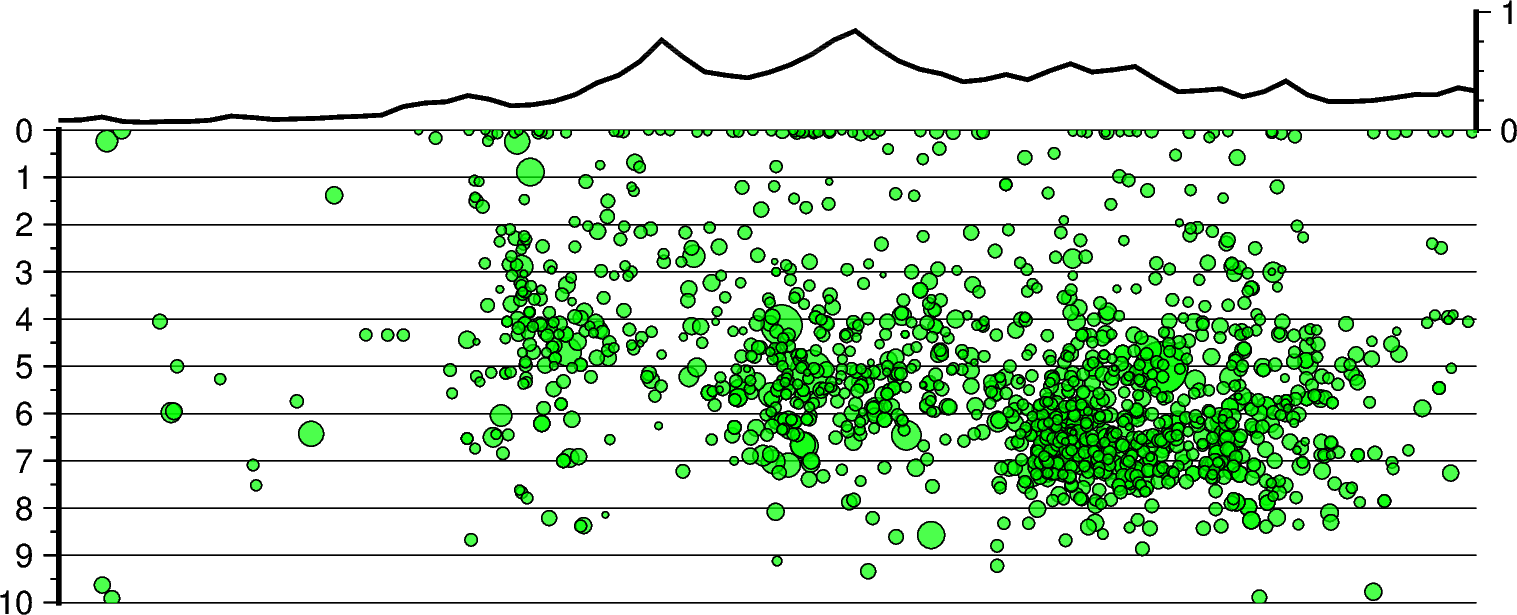

In [5]:
main_fig = pygmt.Figure()
main_fig = SE.plot_elevation_profile(plot_config=elevation_plot, show=False, in_fig=main_fig, panel=None)
main_fig.shift_origin(yshift="-%f" % SS.fig_height)
main_fig = SS.plot_section(plot_config=section_plot, show=False, in_fig=main_fig, panel=None)
main_fig.show()

## MAP + ELEVATION + DEPTH

Now we also need to initialize the map instance and configuration

In [6]:
MAPREGION = [10.65, 11.18, 43.03, 43.35]

# =============== Map related
map_config = {
  'auto_scale': False,
  'plot_region': MAPREGION,
  'plot_projection': "m",
  'auto_frame': False,
  'plot_frame': {
    'big_x_tick_interval': 0.2,
    'small_x_tick_interval': 0.1,
    'big_y_tick_interval': 0.1,
    'small_y_tick_interval': 0.05,
    'annotate_axis': "WSen"
  },
  'fig_scale': 12
}

map_plot = {
  'event_color': "green@30",
  'event_size': 0.04,       # float: represent a mag 1 eventsize if scale==True
  'scale_magnitude': True,  # bool: if True plot scaled event
  'show_grid': True
}

SM = SPL.SomeMap(database)
SM.set_gridfile(demgrid)
SM.update_configuration(**map_config)

Only MANDATORY field extracted. Missing additional ['OT', 'MAGTYPE']
Auto scaling the class REGION-plot attributes!
Auto scaling the class FRAME-plot attributes!


Now let's go on with plotting the entire MAP

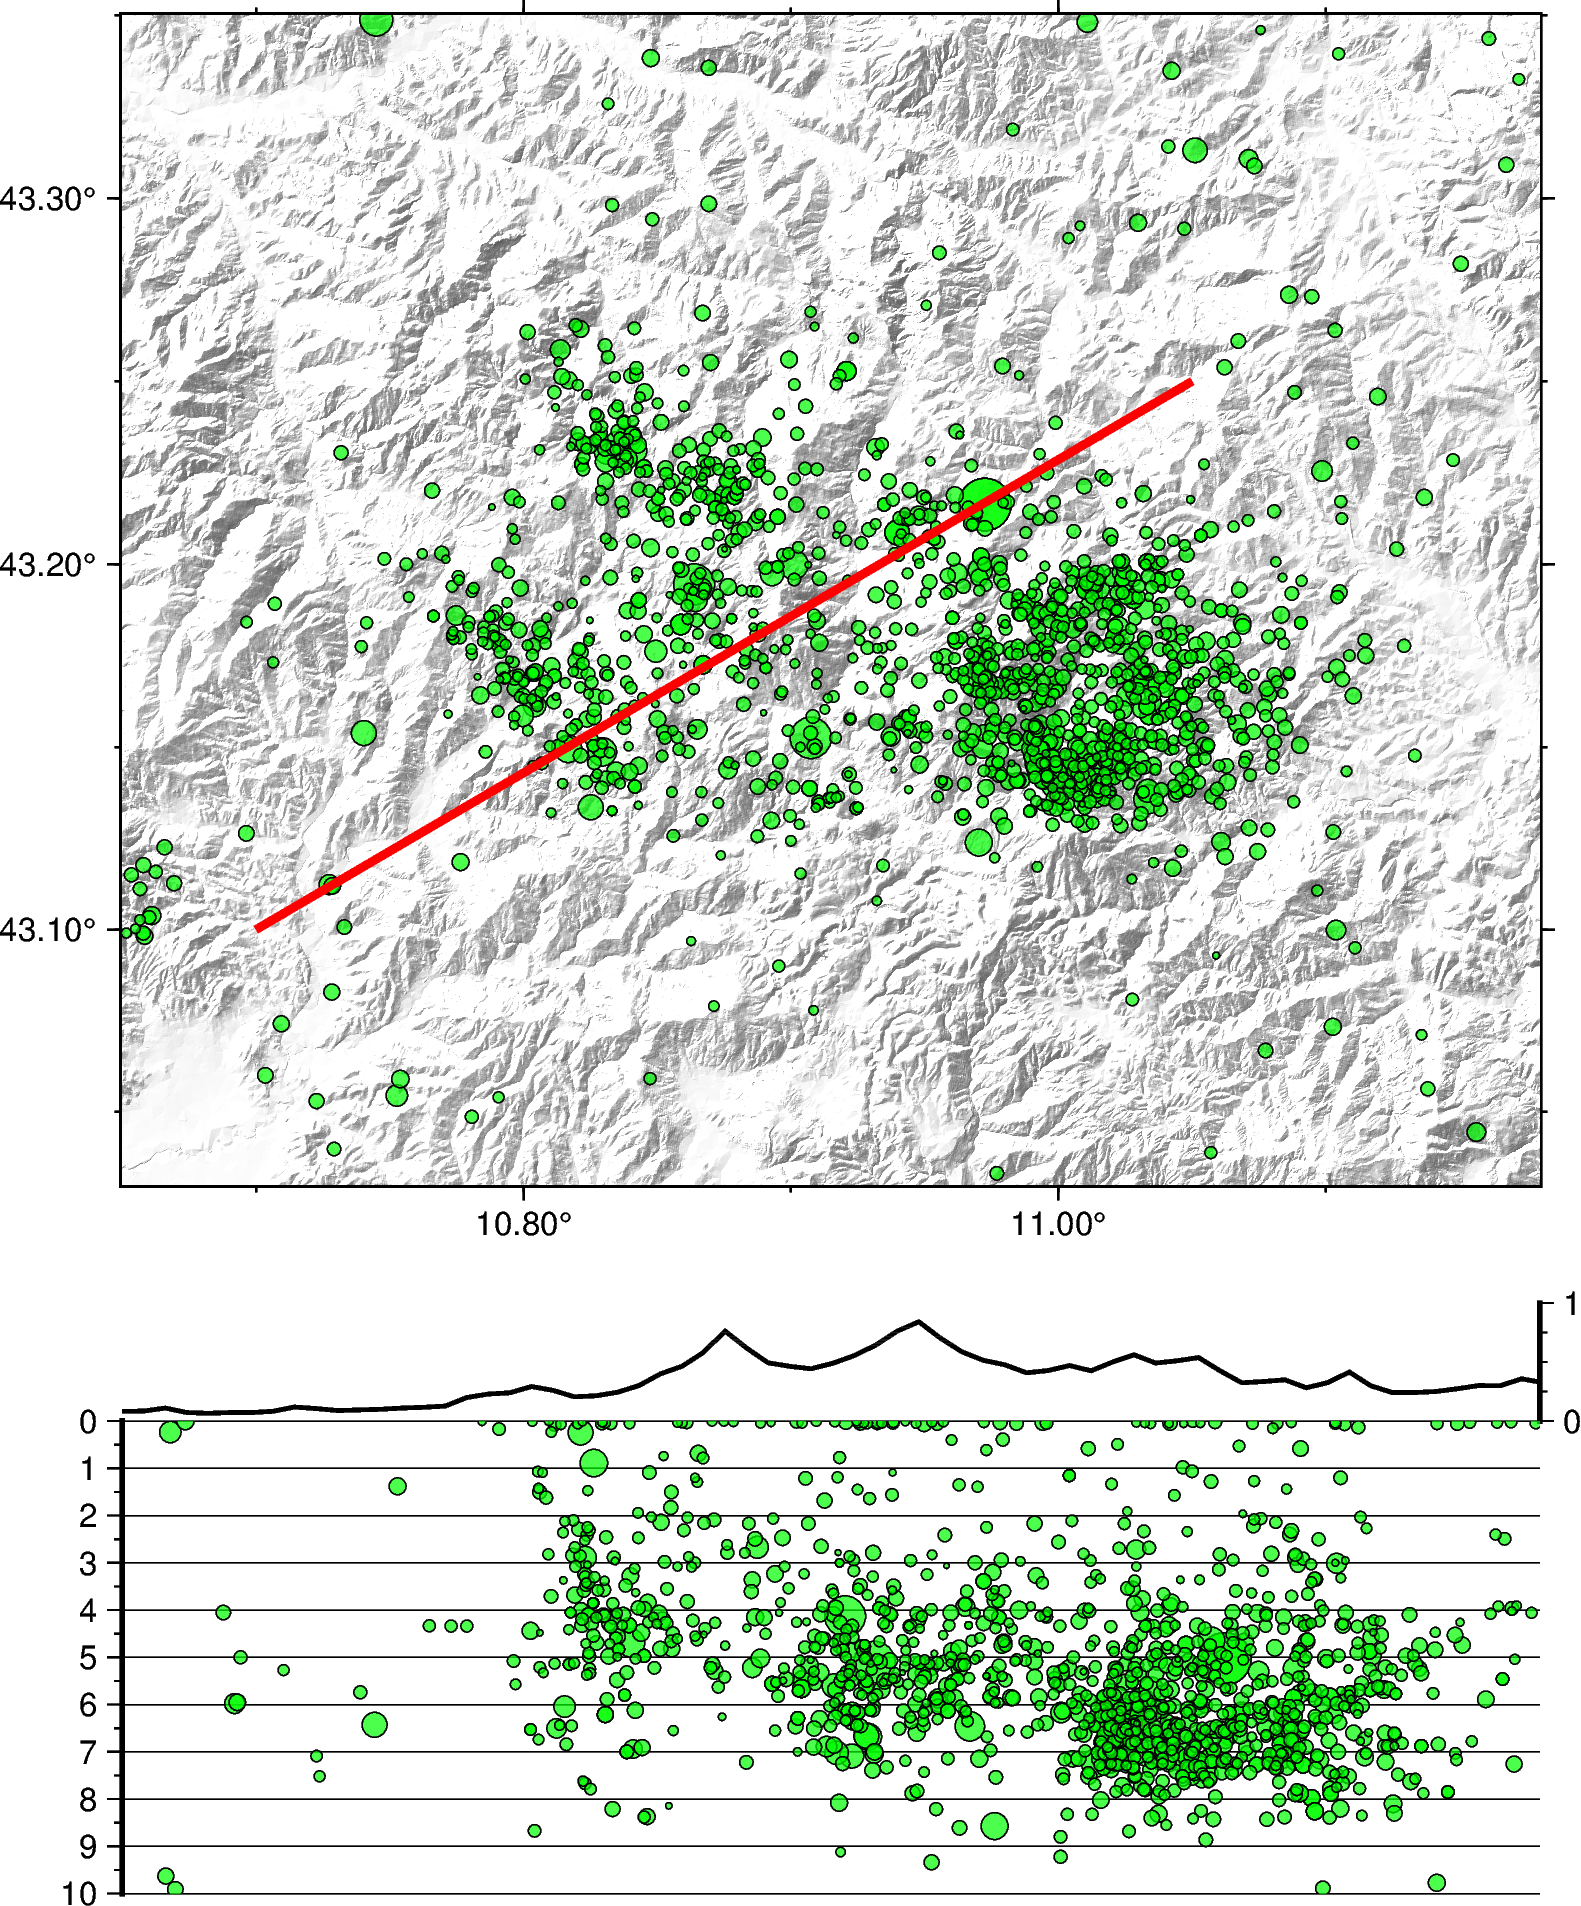

In [7]:
main_fig = pygmt.Figure()

main_fig = SM.plot_map(plot_config=map_plot, show=False, in_fig=main_fig, panel=None)
main_fig.plot(x=[SECTION[0], SECTION[2]], y=[SECTION[1], SECTION[3]], pen="2p,red", straight_line=True)

main_fig.shift_origin(yshift="-%f" % (SE.fig_height+1))  # yshift="h+0.1c")
main_fig = SE.plot_elevation_profile(plot_config=elevation_plot, show=False, in_fig=main_fig, panel=None)

main_fig.shift_origin(yshift="-%f" % SS.fig_height)
main_fig = SS.plot_section(plot_config=section_plot, show=False, in_fig=main_fig, panel=None)

main_fig.show()

There's a script to provide such a complete figure under the bin folder:

`sometools_map_elev_sect.py  DATABASE -g GRID -p PROFILE-COORD -y CONFIGURATION -s SAVEFIGNAME`

Enjoy! :)